In [147]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [148]:
dataset = MNIST(root='/',download=True)

In [149]:
len(dataset)

60000

In [150]:
test_dataset = MNIST(root='/',train=False)

In [151]:
len(test_dataset)

10000

In [152]:
import torchvision.transforms as transforms

In [153]:
dataset = MNIST(root='/',train=True,transform=transforms.ToTensor())

In [154]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


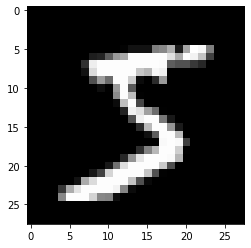

In [155]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0,:,:], cmap='gray')

In [156]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [157]:
from torch.utils.data import DataLoader
batch_size = 128
train_dl = DataLoader(train_ds,batch_size,shuffle=True)
val_dl = DataLoader(val_ds,batch_size)

In [158]:
import torch.nn as nn

In [159]:
input_dim = 28*28
output_dim = 10
model = nn.Linear(input_dim,output_dim)

In [160]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0187,  0.0105,  0.0309,  ..., -0.0254,  0.0199,  0.0305],
        [-0.0162,  0.0290,  0.0323,  ..., -0.0155,  0.0092,  0.0112],
        [-0.0205,  0.0257,  0.0154,  ...,  0.0187,  0.0272, -0.0292],
        ...,
        [ 0.0149, -0.0122,  0.0250,  ...,  0.0220,  0.0073,  0.0240],
        [-0.0100,  0.0267, -0.0310,  ..., -0.0273, -0.0285,  0.0252],
        [-0.0220,  0.0130, -0.0046,  ..., -0.0079,  0.0339,  0.0336]],
       requires_grad=True)

In [161]:
class Mnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        x = x.reshape(-1,28*28)
        print(x.shape)
        out = self.linear(x)
        return out

model = Mnist()


In [162]:
for images,labels in train_dl:
    print(images.shape)
    outputs = model(images)
    break
print(outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
torch.Size([128, 784])
torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0400,  0.2025, -0.1147,  0.0394, -0.0642, -0.1003, -0.4075, -0.0250,
          0.6837, -0.2237],
        [ 0.2046, -0.1153, -0.2716,  0.2451,  0.1755, -0.1868, -0.4061, -0.4508,
          0.5168,  0.0629]])


In [163]:
import torch.nn.functional as F

In [164]:
probs = F.softmax(outputs,dim=1)

In [165]:
probs

tensor([[0.0995, 0.1171, 0.0852,  ..., 0.0932, 0.1894, 0.0764],
        [0.1200, 0.0872, 0.0745,  ..., 0.0623, 0.1640, 0.1042],
        [0.1216, 0.0714, 0.0775,  ..., 0.0984, 0.1458, 0.1138],
        ...,
        [0.1263, 0.0983, 0.0538,  ..., 0.0636, 0.1734, 0.1014],
        [0.0975, 0.0733, 0.0897,  ..., 0.1218, 0.1297, 0.1088],
        [0.0994, 0.0849, 0.0669,  ..., 0.0980, 0.1666, 0.1010]],
       grad_fn=<SoftmaxBackward0>)

In [166]:
max_prob,preds = torch.max(probs,dim=1)

In [167]:
max_prob

tensor([0.1894, 0.1640, 0.1458, 0.1872, 0.1325, 0.1410, 0.1435, 0.1351, 0.1502,
        0.1367, 0.1238, 0.1552, 0.1290, 0.1292, 0.1478, 0.1603, 0.1578, 0.1499,
        0.1646, 0.1192, 0.1221, 0.1657, 0.1394, 0.1355, 0.1378, 0.1572, 0.1405,
        0.1379, 0.1522, 0.1558, 0.1241, 0.1367, 0.1302, 0.1513, 0.1478, 0.1624,
        0.1640, 0.1260, 0.1329, 0.1265, 0.1706, 0.1483, 0.1791, 0.1195, 0.1407,
        0.1230, 0.1320, 0.1274, 0.1378, 0.1245, 0.1749, 0.1799, 0.1789, 0.1249,
        0.1179, 0.1364, 0.1411, 0.1377, 0.1353, 0.1575, 0.1454, 0.1314, 0.1506,
        0.1374, 0.1280, 0.1502, 0.1462, 0.1180, 0.1468, 0.1254, 0.1125, 0.1623,
        0.1172, 0.1379, 0.1240, 0.1266, 0.1609, 0.1260, 0.1312, 0.1399, 0.1343,
        0.1206, 0.1224, 0.1394, 0.1638, 0.1312, 0.1130, 0.1313, 0.1654, 0.1536,
        0.1462, 0.1246, 0.1687, 0.1575, 0.1427, 0.1425, 0.1246, 0.1245, 0.1554,
        0.1594, 0.1343, 0.1154, 0.1188, 0.1336, 0.1523, 0.1647, 0.1782, 0.1259,
        0.1462, 0.1297, 0.1434, 0.1574, 

In [168]:
preds

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 0, 8, 8, 8, 8, 8, 8, 4, 7, 8, 8, 3,
        8, 8, 3, 8, 8, 8, 3, 8, 8, 3, 8, 8, 8, 9, 3, 9, 8, 8, 8, 0, 8, 8, 0, 0,
        8, 8, 8, 8, 8, 7, 0, 8, 8, 3, 0, 8, 3, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        7, 8, 8, 3, 8, 8, 0, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 7,
        7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 9, 8, 9, 8, 8, 8,
        9, 8, 8, 8, 8, 8, 8, 8])

In [169]:
labels

tensor([2, 9, 3, 9, 7, 3, 2, 8, 9, 9, 6, 8, 8, 8, 4, 9, 5, 0, 7, 1, 1, 0, 0, 6,
        0, 2, 6, 5, 0, 7, 6, 7, 5, 0, 3, 8, 9, 1, 0, 1, 0, 0, 6, 4, 7, 2, 5, 4,
        8, 1, 9, 9, 8, 2, 5, 9, 4, 6, 6, 8, 0, 1, 4, 6, 2, 4, 2, 4, 8, 1, 1, 0,
        1, 7, 6, 6, 0, 1, 4, 2, 1, 1, 1, 0, 9, 7, 8, 9, 9, 7, 3, 6, 9, 2, 4, 2,
        1, 9, 0, 0, 4, 1, 5, 2, 0, 4, 2, 1, 8, 8, 0, 4, 7, 6, 3, 0, 8, 9, 1, 0,
        1, 4, 9, 4, 7, 4, 2, 3])

In [170]:
loss_fn = F.cross_entropy

In [171]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3068, grad_fn=<NllLossBackward0>)


In [172]:
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

In [173]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [174]:
def evaluate(model,val_dl):
    outputs =  []
    for batch in val_dl:
        images,labels = batch
        out = model(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        outputs.append({'val_loss': loss, 'val_acc': acc})
    
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

In [175]:
def fit(epochs,model,train_dl,val_dl,opt):
    history = []
    for epoch in range(epochs):
        for batch in train_dl:
            images, labels = batch
            preds = model(images)
            loss = F.cross_entropy(preds,labels)
            loss.backward()
            opt.step()
            opt.zero_grad
            
        result = evaluate(model,val_dl)
        history.append(result)

    return history


In [194]:
history1 = fit(20, model, train_dl, val_dl,opt)

torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size(

In [195]:
history1

[{'val_loss': 0.9000171422958374, 'val_acc': 0.8885482549667358},
 {'val_loss': 0.9264518618583679, 'val_acc': 0.8913172483444214},
 {'val_loss': 0.9529568552970886, 'val_acc': 0.8928995132446289},
 {'val_loss': 0.9804513454437256, 'val_acc': 0.8934928774833679},
 {'val_loss': 1.0080398321151733, 'val_acc': 0.8956685066223145},
 {'val_loss': 1.034281611442566, 'val_acc': 0.8962618708610535},
 {'val_loss': 1.0584516525268555, 'val_acc': 0.8965585231781006},
 {'val_loss': 1.0812925100326538, 'val_acc': 0.8970530033111572},
 {'val_loss': 1.1033294200897217, 'val_acc': 0.8977452516555786},
 {'val_loss': 1.1247483491897583, 'val_acc': 0.8981408476829529},
 {'val_loss': 1.1456620693206787, 'val_acc': 0.8989319801330566},
 {'val_loss': 1.1659400463104248, 'val_acc': 0.899030864238739},
 {'val_loss': 1.185509204864502, 'val_acc': 0.899030864238739},
 {'val_loss': 1.2041587829589844, 'val_acc': 0.8987341523170471},
 {'val_loss': 1.221236228942871, 'val_acc': 0.8989319801330566},
 {'val_loss': 1

In [196]:
test_dataset = MNIST(root = '/',train=False, transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


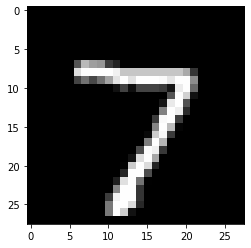

In [197]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [198]:
def predict_image(img,model):
    output = model(img)
    _,pred = torch.max(output,dim=1)
    return pred[0].item()

torch.Size([1, 784])
Label: 0 , Predicted: 0


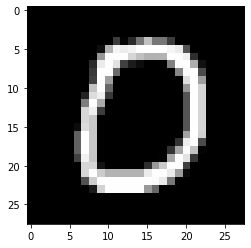

In [199]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

torch.Size([1, 784])
Label: 9 , Predicted: 3


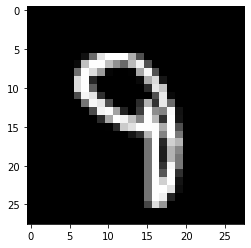

In [200]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

torch.Size([1, 784])
Label: 2 , Predicted: 2


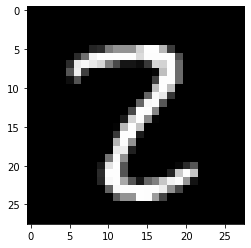

In [201]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))